In [85]:
from google.colab import files
uploaded = files.upload()

Saving drug200.csv to drug200 (2).csv


In [86]:
import io
import pandas as pd

drugs = pd.read_csv(io.BytesIO(uploaded['drug200.csv']))

In [87]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn import linear_model, naive_bayes, neighbors, svm

In [88]:
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


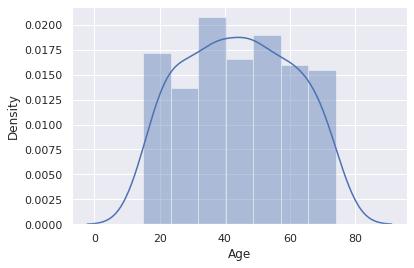

In [89]:
sns.distplot(drugs['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


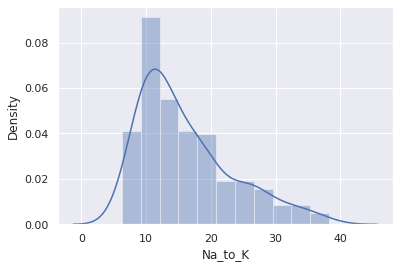

In [90]:
sns.distplot(drugs['Na_to_K'])

In [91]:
drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [92]:
age_groups = []
for i in drugs['Age']:
  if i <= 30:
    age_groups.append('0-30')
  if i > 30 and i <= 40:
    age_groups.append('30-40')
  if i > 40 and i <= 50:
    age_groups.append('40-50')
  if i > 50 and i <= 60:
    age_groups.append('50-60')
  if i > 60:
    age_groups.append('60+')

drugs['AgeGroup'] = age_groups

#30세 이하는 '0-30', 30세~40세는 '30-40', 40세~50세는 '40-50', 50세~60세는 '50-60', 
#60세 초과는 '60+'로 grouping 해줬음

In [93]:
na_to_k_groups = []
for i in drugs['Na_to_K']:
  if i <= 10:
    na_to_k_groups.append('5-10') #'Na_to_K의 최소값은 6.269000
  if i > 10 and i <= 15:
    na_to_k_groups.append('10-15')
  if i > 15 and i <= 20:
    na_to_k_groups.append('15-20')
  if i > 20 and i <= 25:
    na_to_k_groups.append('20-25')
  if i > 25 and i <= 30:
    na_to_k_groups.append('25-30')
  if i > 30:
    na_to_k_groups.append('30+')

drugs['Na_to_K_groups'] = na_to_k_groups

#Sodium to Potassium ratios가 10이하일 경우 '5-10', 10~15일 경우 '10-15',
#15~20일 경우 '15-20', 20~25일 경우 '20-25', 25~30일 경우 '25-30', 30세 초과는
#'30+'로 grouping 해줬음

In [94]:
drugs = drugs[['AgeGroup', 'Sex', 'BP', 'Cholesterol', 'Na_to_K_groups', 'Drug']]
#Age와 Na_to_K 변수를 AgeGroup, Na_to_K_groups로 대체
drugs.head()

,AgeGroup,Sex,BP,Cholesterol,Na_to_K_groups,Drug
0,0-30,F,HIGH,HIGH,25-30,DrugY
1,40-50,M,LOW,HIGH,10-15,drugC
2,40-50,M,LOW,HIGH,10-15,drugC
3,0-30,F,NORMAL,HIGH,5-10,drugX
4,60+,F,LOW,HIGH,15-20,DrugY


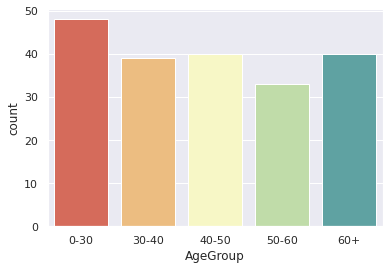

In [95]:
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'AgeGroup', data = drugs, palette = 'Spectral',
              order = ['0-30', '30-40', '40-50', '50-60', '60+'])
#order지정 안해주면 0-30, 40-50, 60+, 50-60, 30-40순으로 나옴

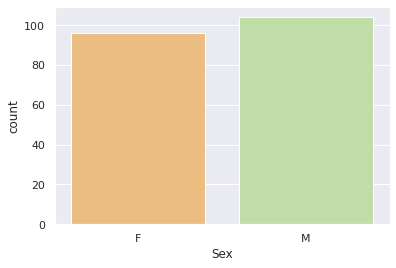

In [96]:
sns.countplot(x = 'Sex', data = drugs, palette = 'Spectral')

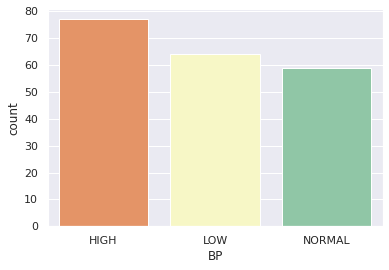

In [97]:
sns.countplot(x = 'BP', data = drugs, palette = 'Spectral')

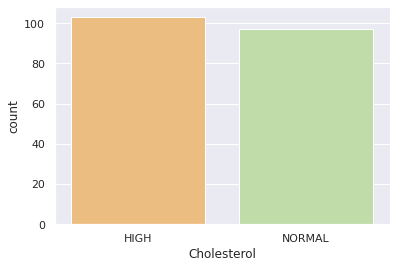

In [98]:
sns.countplot(x = 'Cholesterol', data = drugs, palette = 'Spectral')

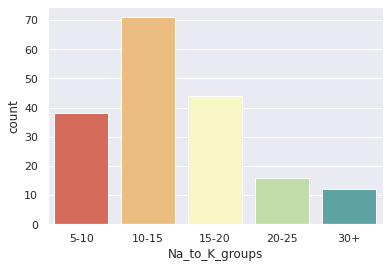

In [99]:
sns.countplot(x = 'Na_to_K_groups', data = drugs, palette = 'Spectral', 
              order = ['5-10', '10-15', '15-20', '20-25', '30+'])

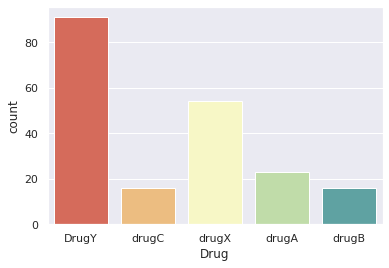

In [100]:
sns.countplot(x = 'Drug', data = drugs, palette = 'Spectral')
#약의 종류별 빈도가 서로 매우 다름(뷸균형 데이터)
#따라서 SMOTE기법 이용(drug A, B, C, X를 drug Y와 같은 수로 과대표집)

In [101]:
x, y = drugs.values[:, :-1], drugs.values[:, -1]
#x에는 drug column을 제외한 모든 데이터를, y에는 drug column만을 할당

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [103]:
x_train = pd.get_dummies(pd.DataFrame(x_train))
x_test = pd.get_dummies(pd.DataFrame(x_test))
#모든 변수들이 범주형 변수이기 때문에 get_dummies함수를 이용하여 one-hot encoding해줌

In [104]:
x_train, y_train = SMOTE().fit_resample(x_train, y_train)
#train데이터를 SMOTE기법을 이용하여 과대표집해줌

[Text(0.5, 0, 'Drug')]

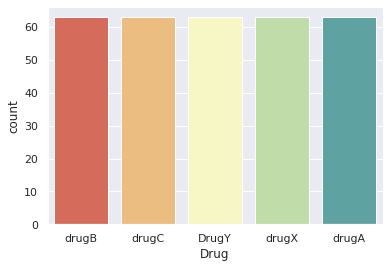

In [105]:
ax = sns.countplot(x = y_train, data = drugs, palette = 'Spectral')
ax.set(xlabel = 'Drug')
#ax만 출력 시 x축에 Drug 미포함
#SMOTE를 이용한 과대표집이 잘 실행되었음을 확인 할 수 있음
#최초에 y에서는 DrugY의 빈도가 91이었는데 과대표집의 결과 빈도가 68밖에 안돼서 의문을 가졌으나
#생각해보니 y를 train data와 test data로 분할해줬기 때문에 y_train의 수가 y의 수보다
#적기 때문에 당연한 결과였음

In [111]:
print('ORIGINAL dataset:', len(drugs), '\n EXTENDED dataset:', len(y))
#Dataset has been extended by 255라고 설명이 달려있는데 결과에는 둘 다 200으로만 나와서
#이 코드가 무슨 코드인지 잘 모르겠음
print('ORIGINAL dataset:', len(drugs), '\n EXTENDED dataset:', len(y_train))
#y자리에 y_train을 넣으면 extended data의 수가 315로 나오나, 이것이 이 코드를 쓴 사람의 의도인지는
#잘 모르겠음

ORIGINAL dataset: 200 
 EXTENDED dataset: 200
ORIGINAL dataset: 200 
 EXTENDED dataset: 315


In [113]:
log_reg = linear_model.LogisticRegression(max_iter = 5000)
log_reg.fit(x_train, y_train)
log_rec_acc = 100 * log_reg.score(x_test, y_test)
print('Logistic Regression Predictions: \n', log_reg.predict(x_test),
      '\n Accuracy:', log_rec_acc, '%')
#로지스틱 회귀모형을 통한 분류는 성능이 좋은 것으로 확인됨

Logistic Regression Predictions: 
 ['DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugX'
 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'drugX' 'drugX' 'DrugY' 'drugX'
 'drugA' 'drugX' 'DrugY' 'drugX' 'drugA' 'drugA' 'drugA' 'drugC' 'DrugY'
 'drugX' 'drugC' 'drugB' 'drugA' 'drugX' 'drugX' 'drugX' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'drugA' 'drugB' 'DrugY' 'DrugY'
 'DrugY' 'drugC' 'drugX' 'drugB' 'drugX' 'DrugY' 'drugX' 'drugX' 'DrugY'
 'DrugY' 'drugC' 'drugX' 'drugX' 'DrugY' 'drugB' 'drugC' 'DrugY' 'drugA'
 'drugX' 'drugX' 'DrugY'] 
 Accuracy: 96.96969696969697 %


In [114]:
nb = naive_bayes.GaussianNB()
nb.fit(x_train, y_train)
nb_acc = 100 * nb.score(x_test, y_test)
print('Naive Bayes Predictions: \n', nb.predict(x_test), 
      '\n Accuracy:', nb_acc, '%')
#나이브 베이즈 모델을 통한 분류 또한 성능이 좋음

Naive Bayes Predictions: 
 ['DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugX'
 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'drugX' 'drugX' 'DrugY' 'drugX'
 'drugA' 'drugX' 'DrugY' 'drugX' 'drugA' 'drugA' 'drugA' 'drugC' 'DrugY'
 'drugX' 'drugC' 'drugB' 'drugA' 'drugX' 'drugX' 'drugX' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'drugA' 'drugB' 'DrugY' 'DrugY'
 'DrugY' 'drugC' 'drugX' 'drugB' 'drugX' 'DrugY' 'drugX' 'drugX' 'DrugY'
 'DrugY' 'drugC' 'drugX' 'drugX' 'DrugY' 'drugB' 'drugC' 'DrugY' 'drugA'
 'drugX' 'drugX' 'DrugY'] 
 Accuracy: 96.96969696969697 %


In [115]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 25)
#n_neightbors: number of neighbors to use by default for kneighbors queries
knn.fit(x_train, y_train)
knn_acc = 100 * knn.score(x_test, y_test)
print('K-Nearest Neighbours Predictions: \n', knn.predict(x_test), 
      '\n Accuracy:', knn_acc, '%')
#knn을 통한 분류는 앞선 로지스틱 회귀모형이나 나이브 베이즈 모델을 통한 분류보다 성능이 많이 떨어짐

K-Nearest Neighbours Predictions: 
 ['DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugX'
 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'drugX' 'drugX' 'DrugY' 'drugX'
 'drugA' 'drugC' 'DrugY' 'drugX' 'drugA' 'drugA' 'drugA' 'drugC' 'DrugY'
 'drugX' 'drugX' 'DrugY' 'drugX' 'drugC' 'drugX' 'drugX' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugB' 'drugB' 'DrugY' 'DrugY'
 'drugX' 'drugC' 'drugX' 'drugA' 'drugX' 'DrugY' 'drugX' 'drugX' 'DrugY'
 'DrugY' 'DrugY' 'drugX' 'drugX' 'DrugY' 'drugB' 'drugC' 'DrugY' 'drugA'
 'drugX' 'drugA' 'DrugY'] 
 Accuracy: 84.84848484848484 %


In [116]:
svm = svm.SVC(kernel = 'linear')
svm.fit(x_train, y_train)
svm_acc = 100 * svm.score(x_test, y_test)
print('SVM Predictions: \n', svm.predict(x_test),
      '\n Accuracy:', svm_acc, '%')
#support vector machine을 이용한 분류의 경우 100%의 정확도를 보임

SVM Predictions: 
 ['DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugX'
 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'drugX' 'drugX' 'DrugY' 'drugX'
 'drugA' 'drugC' 'DrugY' 'drugX' 'drugA' 'drugA' 'drugA' 'drugC' 'DrugY'
 'drugX' 'drugC' 'drugB' 'drugA' 'drugC' 'drugX' 'drugX' 'DrugY' 'drugX'
 'DrugY' 'DrugY' 'DrugY' 'DrugY' 'drugA' 'drugA' 'drugB' 'DrugY' 'DrugY'
 'DrugY' 'drugC' 'drugX' 'drugB' 'drugX' 'DrugY' 'drugX' 'drugX' 'DrugY'
 'DrugY' 'drugC' 'drugX' 'drugX' 'DrugY' 'drugB' 'drugC' 'DrugY' 'drugA'
 'drugX' 'drugX' 'DrugY'] 
 Accuracy: 100.0 %


In [118]:
pd.DataFrame(data = {'Model' : ['Logistic Regression', 'Gaussian Naive Bayes',
                                'K-Nearest Neighbours', 'Support Vector Machine(SVM)'],
                     'Accuracy %' : [log_rec_acc, nb_acc, knn_acc, svm_acc]})

,Model,Accuracy %
0,Logistic Regression,96.969697
1,Gaussian Naive Bayes,96.969697
2,K-Nearest Neighbours,84.848485
3,Support Vector Machine(SVM),100.000000


Logistic Regression, Gaussian Naive Bayes, Support Vector Machine이 분류를 훌륭하게 해내고 있음을 확인할 수 있었다. 그 중 Support Vector Machine의 분류 정확도는 100%였다. 반면, KNN을 통한 분류는 나머지 모델에 비해 상대적으로 그 성능이 떨어졌다.